In [1]:
import simcat
import toytree
import toyplot
import numpy as np

In [2]:
tree = toytree.rtree.coaltree(5, seed=11111).jitter.scale_root_height(3)
tree.draw(tree_style='c');

idx: 4
name: r4
dist: 0.5710197335103322
support: 100
height: 0.0 0 idx: 3
name: r3
dist: 0.5710197335103322
support: 100
height: 0.0 1 idx: 2
name: r2
dist: 1.4914758217626765
support: 100
height: 0.0 2 idx: 1
name: r1
dist: 1.386897052580312
support: 100
height: 0.0 3 idx: 0
name: r0
dist: 1.386897052580312
support: 100
height: 0.0 4 idx: 5
name: i5
dist: 0.9204560882523442
support: 100
height: 0.5710197335103326 5 idx: 6
name: i6
dist: 1.5085241782373233
support: 100
height: 1.4914758217626767 6 idx: 7
name: i7
dist: 1.6131029474196878
support: 100
height: 1.3868970525803122 7 idx: 8
name: i8
dist: 0.0
support: 100
height: 3.0 8 0 1 2 3

In [5]:
data = simcat.Model(tree, ntests=1)
data.run()


In [6]:
data.counts.shape

(1, 5, 16, 16)

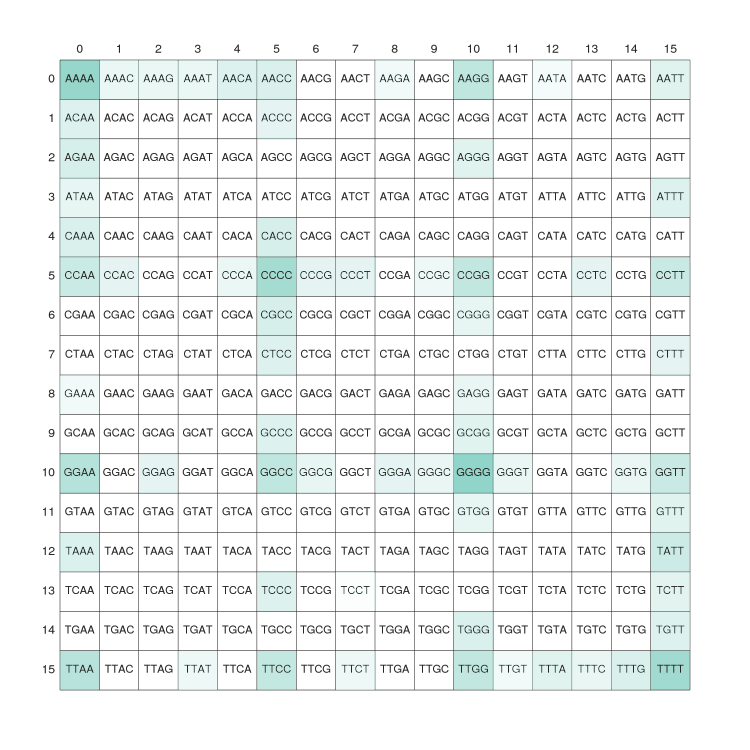

In [8]:
simcat.utils.plot_count_matrix(data.counts[0][2])

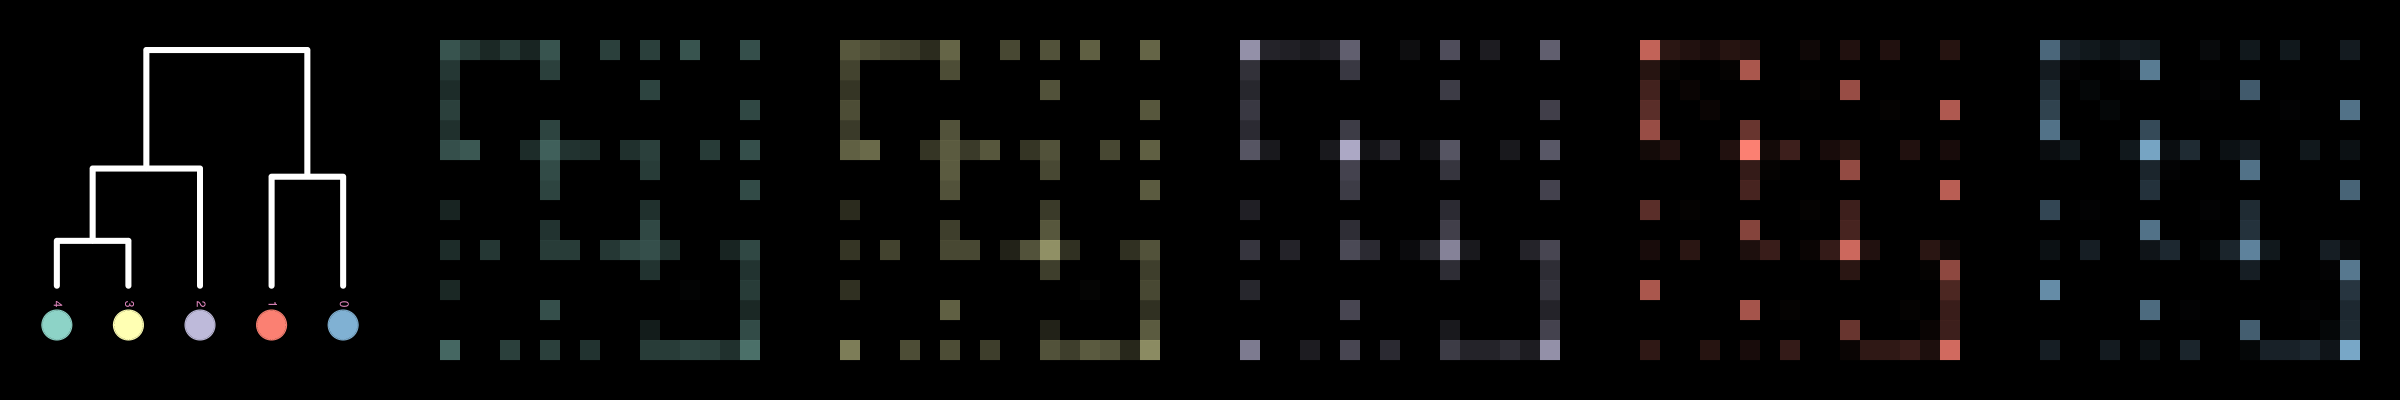

In [24]:
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

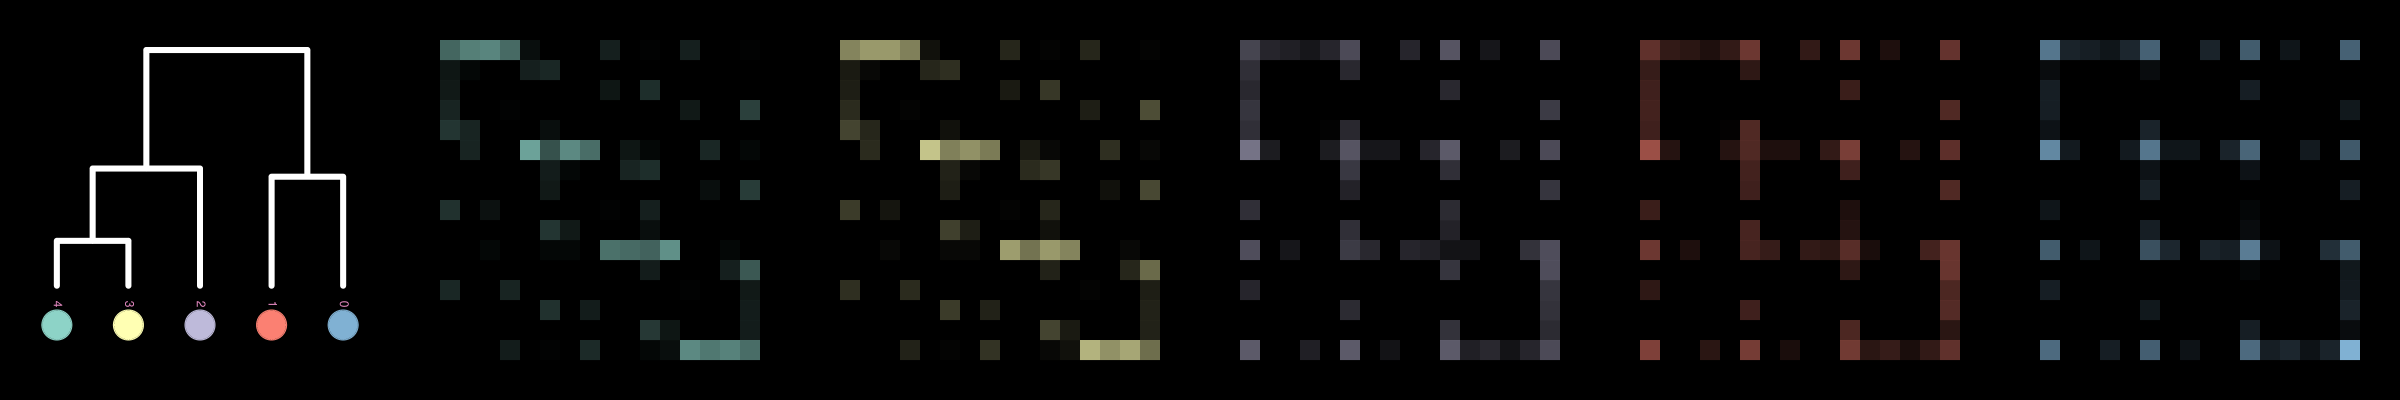

In [10]:
data = simcat.Model(tree, admixture_edges=[(2, 1, 0.2, 0.3, 0.001)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

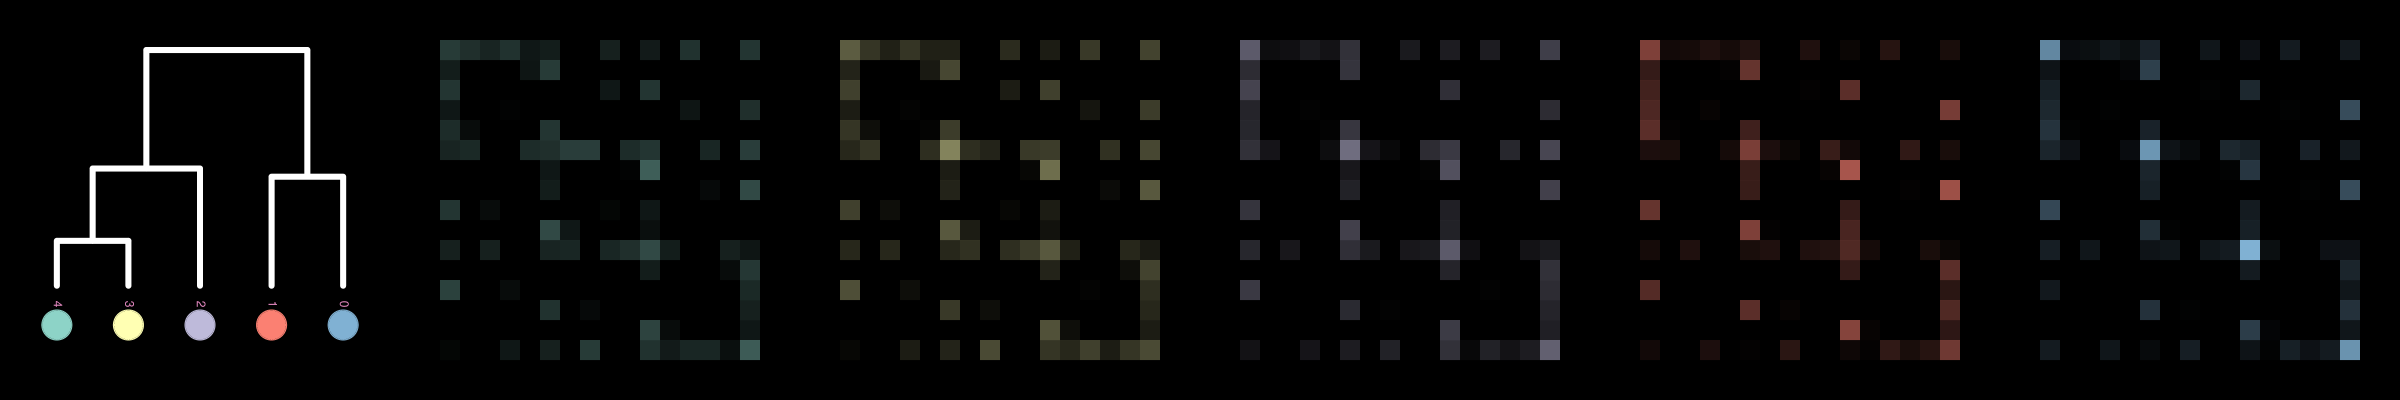

In [12]:
data = simcat.Model(tree, admixture_edges=[(1, 2, 0.2, 0.3, 0.00001)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

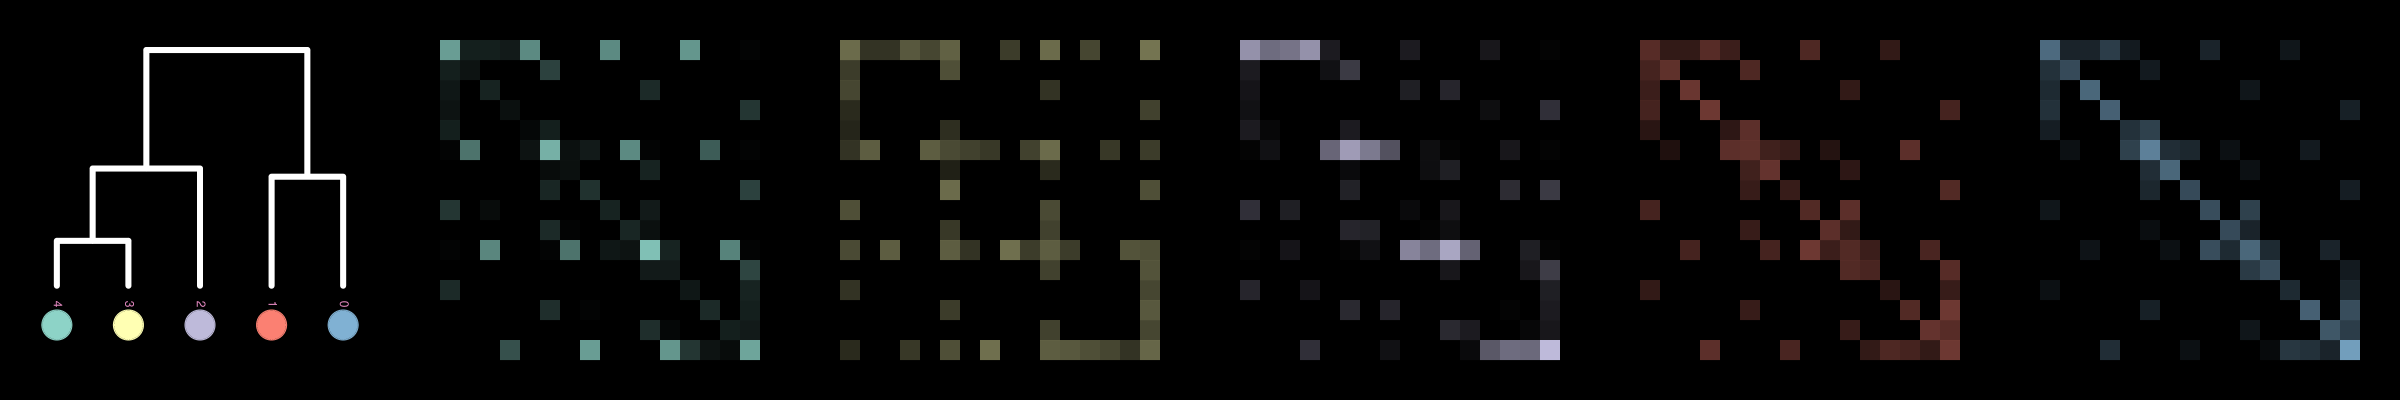

In [26]:
data = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.001)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

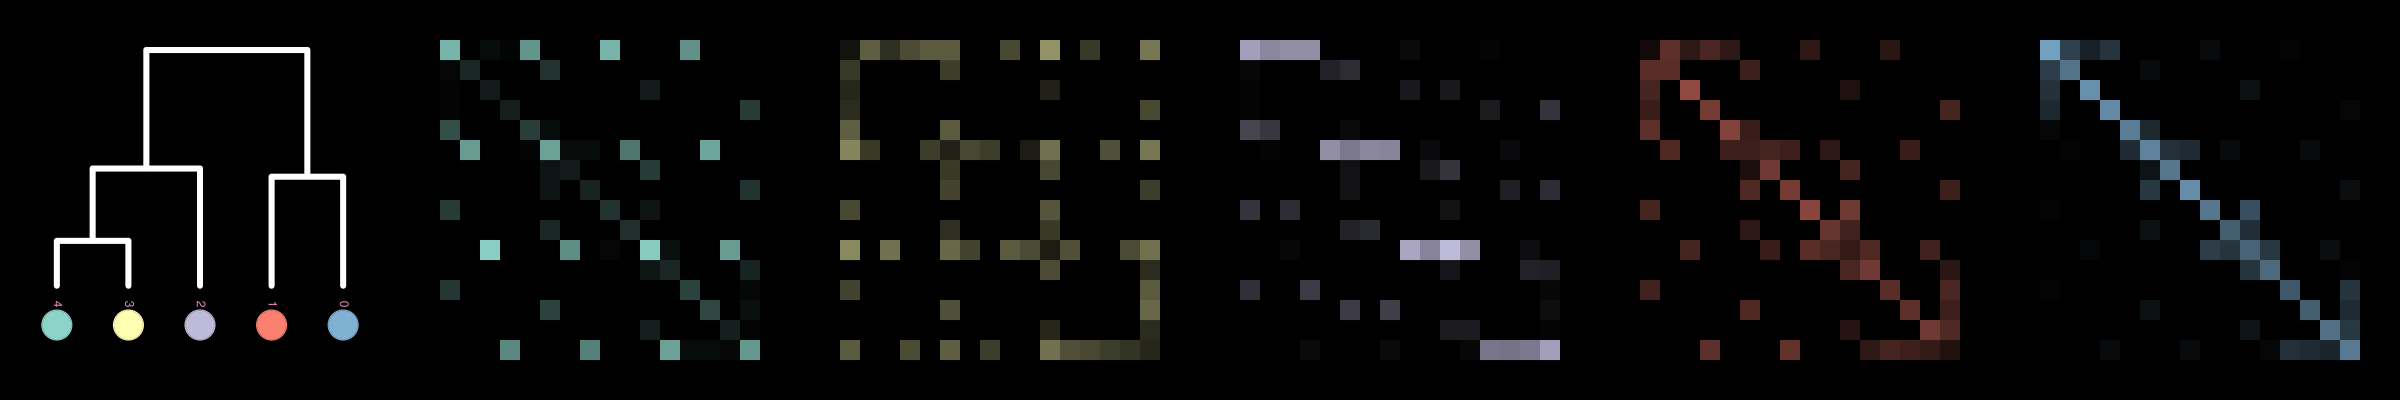

In [29]:
tree = toytree.rtree.coaltree(5, seed=11111).jitter.scale_root_height(10)
data = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.1)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

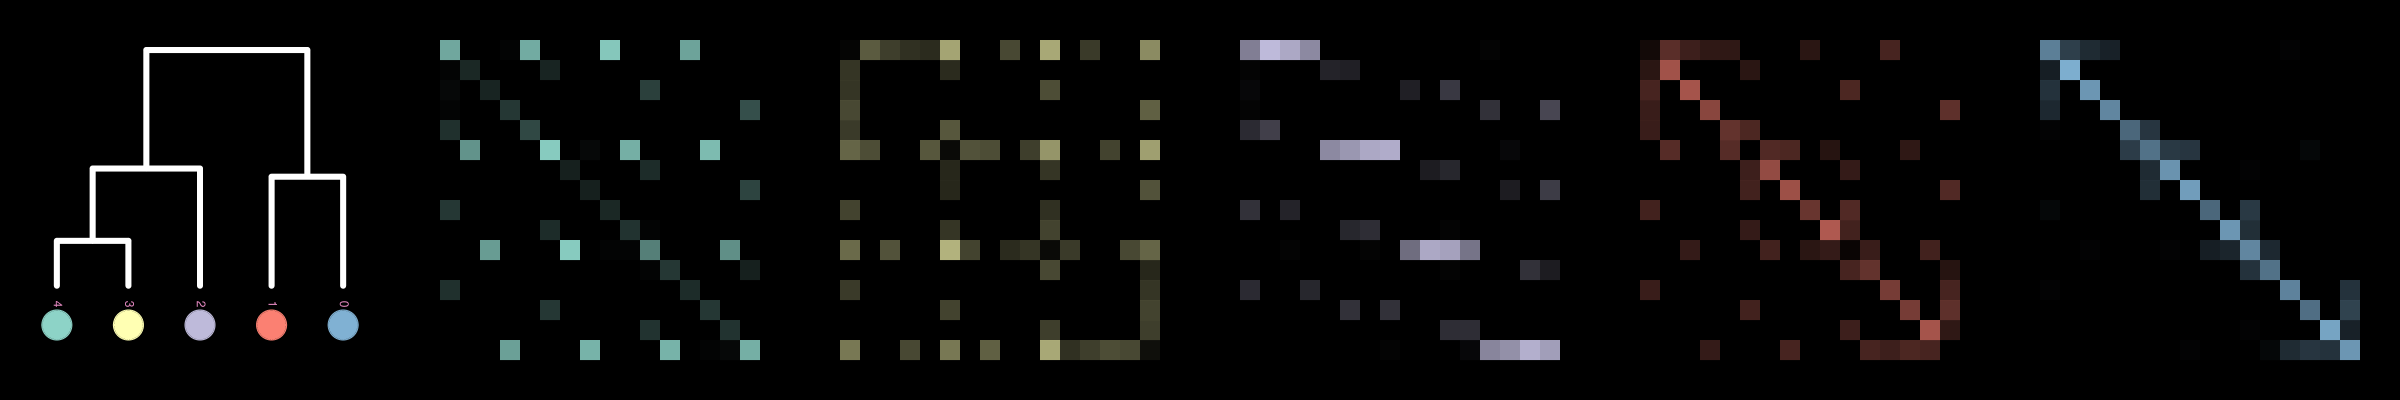

In [31]:
tree = toytree.rtree.coaltree(5, seed=11111).jitter.scale_root_height(100)
data = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.1)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

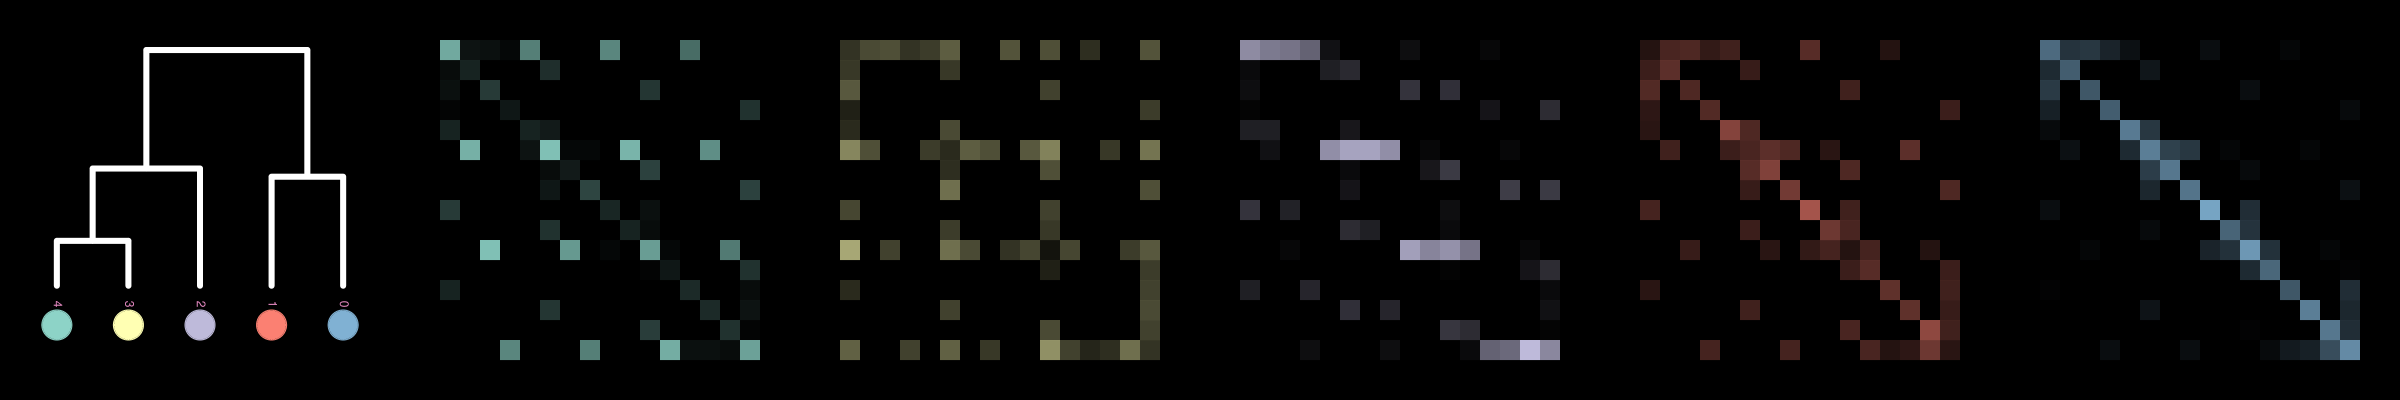

In [35]:
tree = toytree.rtree.coaltree(5, seed=11111).jitter.scale_root_height(10)
data = simcat.Model(tree, theta=0.1, admixture_edges=[(3, 1, 0.2, 0.3, 0.1)], ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

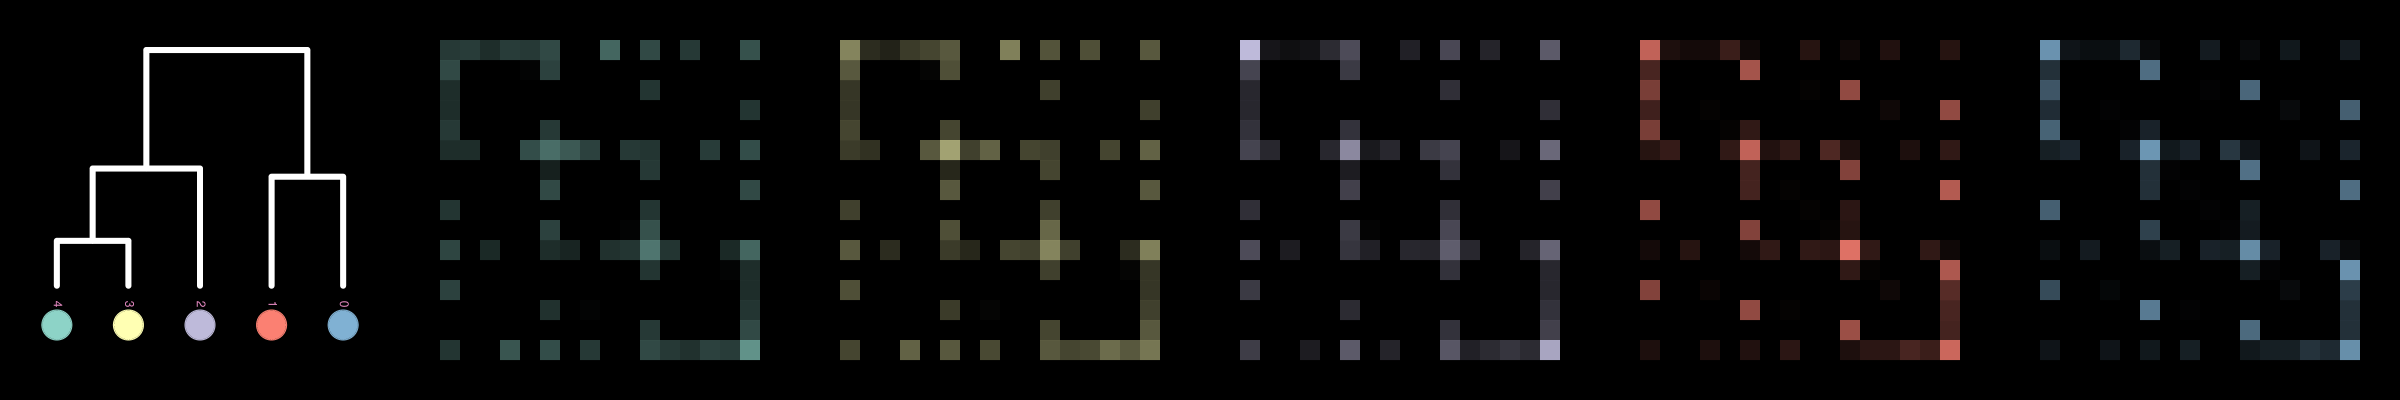

In [38]:
tree = toytree.rtree.coaltree(5, seed=11111).jitter.scale_root_height(3)
data = simcat.Model(tree, 
                    theta=0.001, 
                    admixture_edges=[(3, 1, 0.2, 0.3, 0.0)],
                    ntests=1)
data.run()
simcat.utils.plot_quartet_matrices(tree, data.counts[0])

### Does migration rate affect the fit?

In [220]:
kwargs = {'tree': tree, 'ntests': 1, 'nreps': 5}
obs = simcat.Model(admixture_edges=[(3, 1, 0.2, 0.3, 0.0)], **kwargs)
obs.run()
data = obs.counts

def get_squared_error(rate):
    kwargs = {'tree': tree, 'ntests': 1, 'nreps': data.shape[0]}
    model = simcat.Model(admixture_edges=[(3, 1, 0.2, 0.3, rate)], **kwargs)
    model.run()
    return -1 * np.sum((data - model.counts)**2)

In [214]:
import scipy.optimize as so

In [225]:
model = simcat.Model(admixture_edges=[(3, 1, 0.2, 0.3, 0.0005)], **kwargs)
model.run()


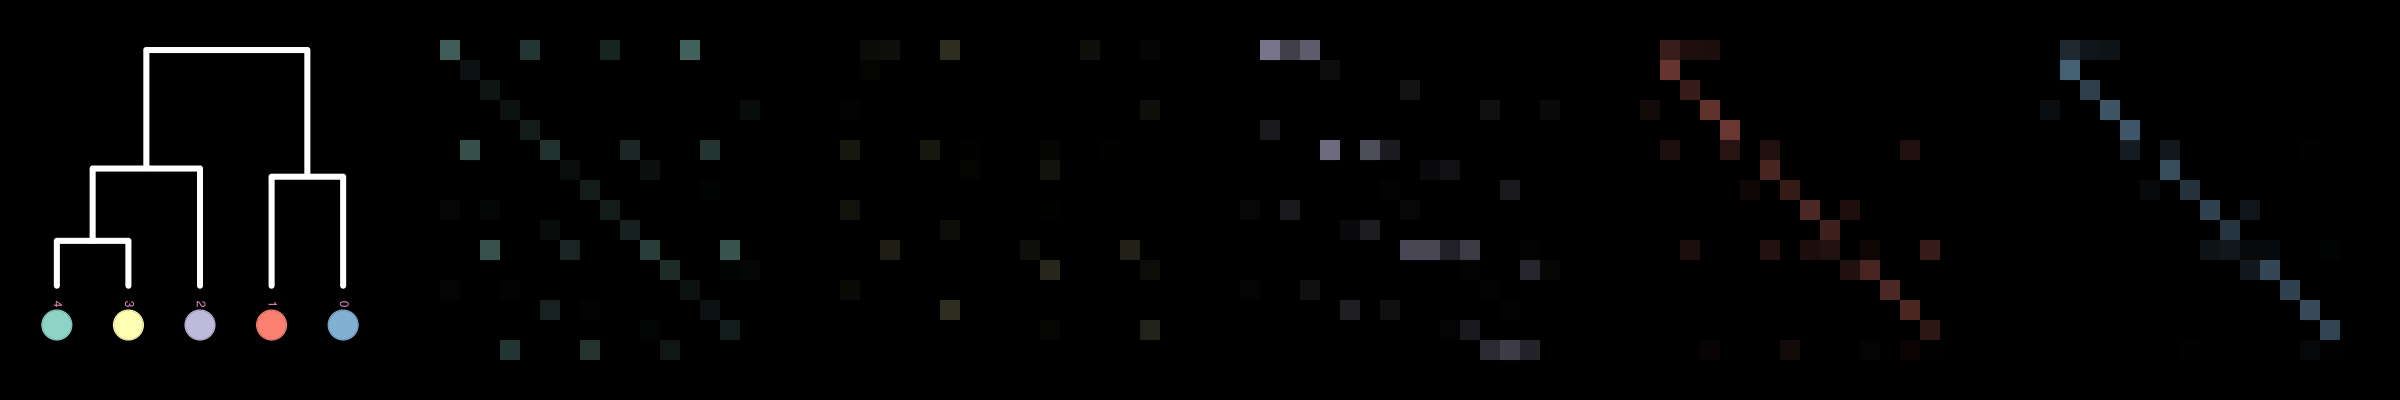

In [247]:
simcat.utils.plot_quartet_matrices(tree, model.counts[0] - data[0])

In [243]:
#(model.counts - data)[0][0]

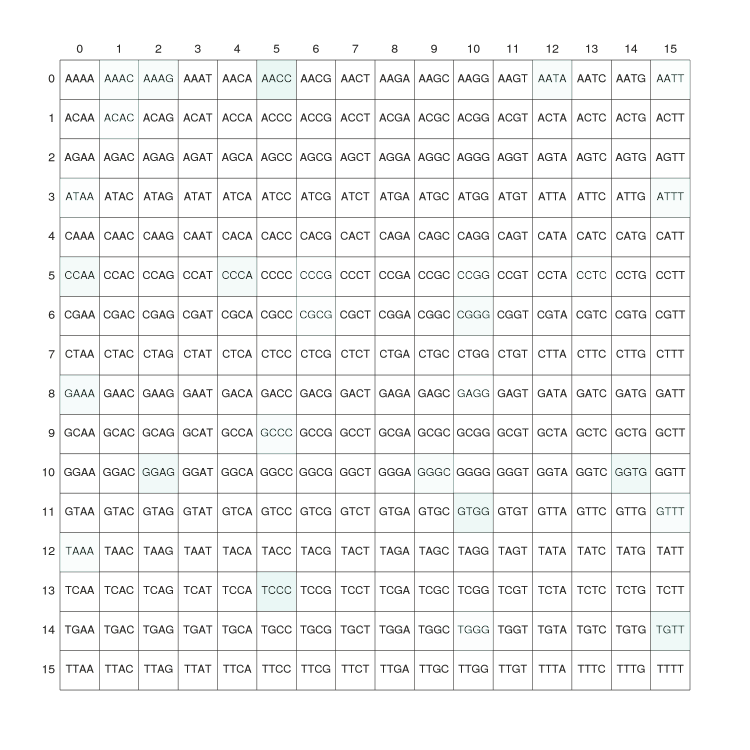

In [245]:
simcat.utils.plot_count_matrix((model.counts - data)[0][1])

In [223]:
get_squared_error(0.001)

-106.38681793212891

In [222]:
get_squared_error(0.0001)

-107.81658935546875

In [219]:
so.fmin_bfgs(get_squared_error, x0=0.00001)

InputError: Bad parameter value provided

In [206]:
so.fmin_bfgs(get_squared_error, x0=0.001)

         Current function value: 111.644730
         Iterations: 1
         Function evaluations: 78
         Gradient evaluations: 22


array([ 0.00100011])

In [175]:
np.sum((obs.counts[:2] - obs.counts[2:4])**2)

6.4355979

In [176]:
np.sum((obs.counts[1:3] - obs.counts[2:4])**2)

11.583011

In [177]:
get_squared_error(obs.counts, 0.1)

214.69656

In [178]:
get_squared_error(obs.counts, 0.01)

221.48289

In [179]:
get_squared_error(obs.counts, 0.0001)

216.3121

In [180]:
get_squared_error(obs.counts, 0.00001)

70.293594

In [181]:
get_squared_error(obs.counts, 0.000001)

43.276913

In [186]:
np.log(12)

2.4849066497880004

In [76]:
rates = [0.1 / (1*10**i) for i in range(6)]
error = 

In [92]:
d1 = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.0)], **kwargs)
d2 = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.01)], **kwargs)
d3 = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.001)], **kwargs)
d4 = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.0001)], **kwargs)
d5 = simcat.Model(tree, admixture_edges=[(3, 1, 0.2, 0.3, 0.00001)], **kwargs)

d1.run()
d2.run()
d3.run()
d4.run()
d5.run()

In [62]:
pd.DataFrame({
    "migration_rate", [0.01, 0.001]
})

23.030989

In [134]:
# mean squared error across replicate tests
np.sum(np.mean(abs(d1.counts - d3.counts), axis=0))

71.593063

In [153]:
np.sum((abs(d1.counts - d3.counts)**2))

117.69408

In [156]:
(abs(d1.counts - d3.counts)**2).sum()

117.69408

In [64]:
np.sum((d1.counts - d3.counts)**2)

114.74826

In [65]:
np.sum((d2.counts - d3.counts)**2)

22.564936

In [66]:
np.sum((d1.counts - d5.counts)**2)

36.284584